FileNotFoundError: [Errno 2] No such file or directory: '/plot/frame_0.png'

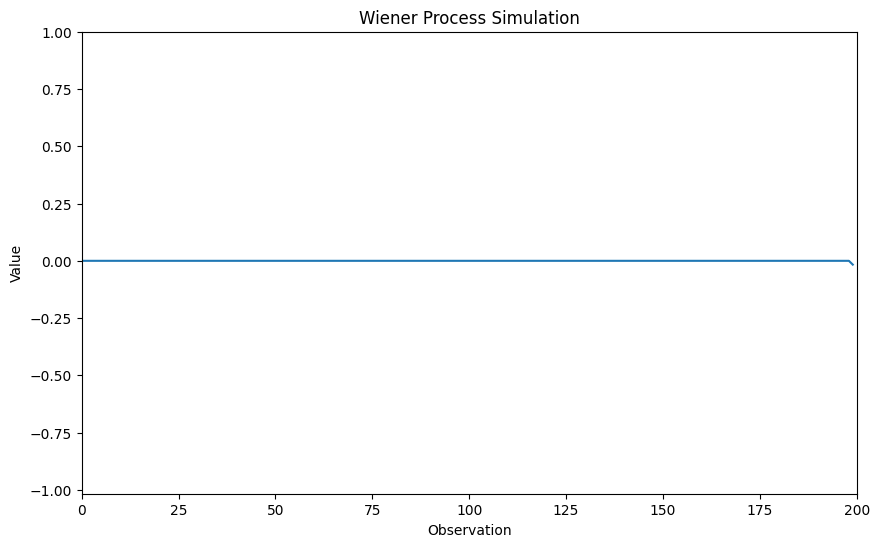

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Parameters
num_obs = 1000
initial_zeros = 200
fps = 15
frames = []

# Initialize Wiener process with 200 observations of zero
wiener_process = np.zeros(initial_zeros)

# Generate the Wiener process and create plots for each frame
for _ in range(num_obs):
    # Add a new observation drawn from a normal distribution
    new_obs = np.random.normal()
    wiener_process = np.append(wiener_process, wiener_process[-1]+new_obs)
    
    # Remove the last observation
    wiener_process = wiener_process[1:]
    
    # Plot the current state of the Wiener process
    plt.figure(figsize=(10, 6))
    plt.plot(wiener_process)
    plt.title("Wiener Process Simulation")
    plt.xlabel("Observation")
    plt.ylabel("Value")
    plt.xlim(0, initial_zeros)
    plt.ylim(wiener_process.min() - 1, wiener_process.max() + 1)
    
    # Save plot to a PNG file buffer
    filename = f"/plot/frame_{_}.png"
    plt.savefig(filename)
    plt.close()
    frames.append(filename)

# Create a GIF from the frames
gif_path = "wiener_process.gif"
imageio.mimsave(gif_path, [imageio.imread(f"/plot/{frame}") for frame in frames], fps=fps)

gif_path


FileNotFoundError: [Errno 2] No such file or directory: '/plot/frame_0.png'

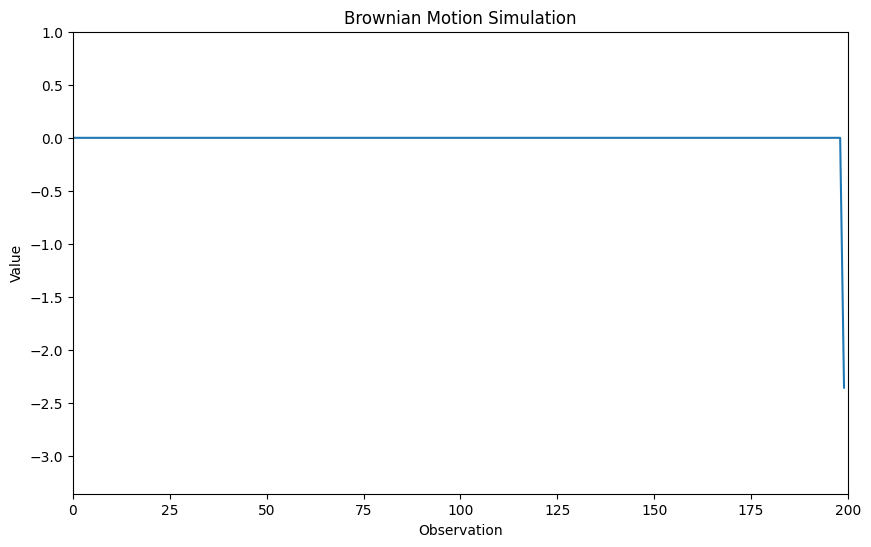

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

# Parameters
num_obs = 1000
initial_zeros = 200
fps = 15
frames = []

# Ensure the /mnt/data/plot/ directory exists
plot_directory = "/plot/"
# os.makedirs(plot_directory, exist_ok=True)

# Initialize Wiener process with 200 observations of zero
wiener_process = np.zeros(initial_zeros)

# Generate the Brownian motion and create plots for each frame
cumulative_sum = 0  # Initialize cumulative sum for Brownian motion
for i in range(num_obs):
    # Add a new observation drawn from a normal distribution to the cumulative sum
    new_obs = np.random.normal()
    cumulative_sum += new_obs
    wiener_process = np.append(wiener_process[1:], cumulative_sum)
    
    # Plot the current state of the Brownian motion
    plt.figure(figsize=(10, 6))
    plt.plot(wiener_process)
    plt.title("Brownian Motion Simulation")
    plt.xlabel("Observation")
    plt.ylabel("Value")
    plt.xlim(0, initial_zeros)
    plt.ylim(wiener_process.min() - 1, wiener_process.max() + 1)
    
    # Save plot to a PNG file in the specified directory
    filename = f"{plot_directory}frame_{i}.png"
    plt.savefig(filename)
    plt.close()
    frames.append(filename)

# Create a GIF from the frames
gif_path = f"brownian_motion.gif"
imageio.mimsave(gif_path, [imageio.imread(frame) for frame in frames], fps=fps)

gif_path
